In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [202]:
df = pd.read_csv("HousePrices.csv")
df = df.drop(columns=['rownames'])

categorical_cols = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

In [203]:
X = df.drop(columns=['price'])
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=22051662)

scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

X_train_scaled = scalerX.fit_transform(X_train)
X_test_scaled = scalerX.transform(X_test)

y_train_scaled = scalerY.fit_transform(y_train)
y_test_scaled = scalerY.transform(y_test)

In [204]:
def regress(model):
    model.fit(X_train_scaled, y_train_scaled)

    y_pred_scaled = model.predict(X_test_scaled)
    ypred = scalerY.inverse_transform(y_pred_scaled)

    mse = mean_squared_error(y_test_scaled, y_pred_scaled)
    mse = mean_squared_error(y_test_scaled, y_pred_scaled)
    mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
    r2 = r2_score(y_test_scaled, y_pred_scaled)
    rmse = np.sqrt(mse)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R²): {r2}")

In [205]:
lr_model = LinearRegression()
regress(lr_model)

Mean Squared Error (MSE): 0.009126827641177542
Mean Absolute Error (MAE): 0.07420480167691655
Root Mean Squared Error (RMSE): 0.09553443170489655
R-squared (R²): 0.6288885076011564


### Second Dataset

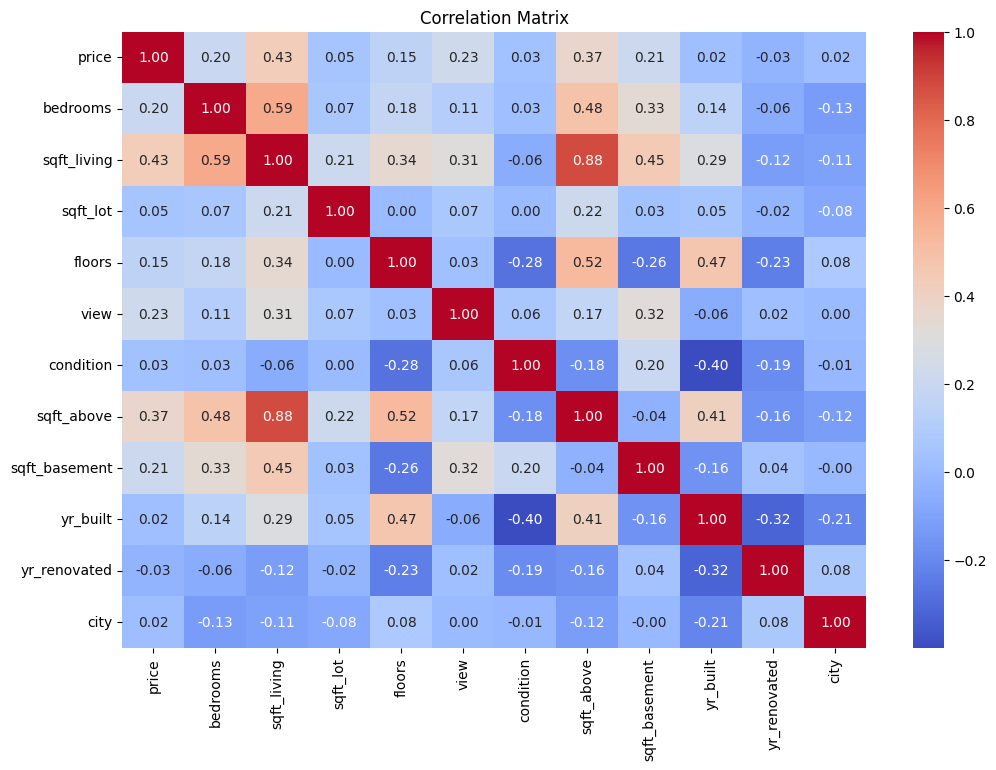

In [206]:
df2 = pd.read_csv("data.csv")
df2 = df2.drop(columns=['street'])

categorical_cols = df2.select_dtypes(include=['object']).columns
encoder = LabelEncoder()

for col in categorical_cols:
    df2[col] = encoder.fit_transform(df2[col])

correlation_matrix = df2.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

threshold = 0.9
correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

df_reduced = df2.drop(columns=correlated_features)

X = df_reduced.drop(columns=['price'])
y = df_reduced[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=22051662)

scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

X_train_scaled = scalerX.fit_transform(X_train)
X_test_scaled = scalerX.transform(X_test)

y_train_scaled = scalerY.fit_transform(y_train)
y_test_scaled = scalerY.transform(y_test)

In [207]:
lr_model = LinearRegression()
regress(lr_model)

Mean Squared Error (MSE): 8.180961315107939e-05
Mean Absolute Error (MAE): 0.006190646545142922
Root Mean Squared Error (RMSE): 0.009044866674035576
R-squared (R²): 0.5120785645385402
